<a href="https://colab.research.google.com/github/Drishty06/PCOS-Sakhi/blob/main/PCOS_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCOS prediction**


### import libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


### loaded the csv file (local file)


In [ ]:
from google.colab import files
data_to_load = files.upload()


### mounted google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/pcos.csv")

file_path_with_infertility="/content/drive/MyDrive/Colab Notebooks/PCOS_infertility.csv"
file_path_without_infertility="/content/drive/MyDrive/Colab Notebooks/PCOS_data_without_infertility.xlsx"

PCOS_inf = pd.read_csv(file_path_with_infertility)
PCOS_woinf = pd.read_excel(file_path_without_infertility, sheet_name="Full_new")

In [ ]:
#Merging the two files as per patient file no. 
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')

#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

#Taking a look at the dataset
data.head()

<ipython-input-16-c04b56d1bfcc>:3: FutureWarning: Passing 'suffixes' as a <class 'set'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  df = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes={'','_y'},how='left')


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1.0,1.0,0.0,28.0,44.6,152.0,19.300000,15.0,78.0,22.0,...,0.0,1.0,0.0,110.0,80.0,3.0,3.0,18.0,18.0,8.5
1,2.0,2.0,0.0,36.0,65.0,161.5,24.921163,15.0,74.0,20.0,...,0.0,0.0,0.0,120.0,70.0,3.0,5.0,15.0,14.0,3.7
2,3.0,3.0,1.0,33.0,68.8,165.0,25.270891,11.0,72.0,18.0,...,1.0,1.0,0.0,120.0,80.0,13.0,15.0,18.0,20.0,10.0
3,4.0,4.0,0.0,37.0,65.0,148.0,29.674945,13.0,72.0,20.0,...,0.0,0.0,0.0,120.0,70.0,2.0,2.0,15.0,14.0,7.5
4,5.0,5.0,0.0,25.0,52.0,161.0,20.060954,11.0,72.0,18.0,...,0.0,0.0,0.0,120.0,80.0,3.0,4.0,16.0,14.0,7.0


In [ ]:
df.head(10)

,Sl No,Patient File No,PCOS (Y/N),Age (yrs),Pregnant(Y/N),No of aborptions,Bloated,facial hair,chest hair,difficult to loose weight,...,Height(Cm),BMI,Blood Group,Pulse rate(bpm),Cycle(months),Cycle length(days),Marriage Status (Yrs),Hip(inch),Waist(inch),Waist/Hip Ratio
0,1,10001,0,28,0,0,0,0,0,0,...,152.0,19.300000,15,78,1,5,7.0,36,30,0.833333
1,2,10002,0,36,1,0,0,0,0,0,...,161.5,24.921163,15,74,1,5,11.0,38,32,0.842105
2,3,10003,1,33,1,0,1,1,1,1,...,165.0,25.270891,11,72,2,5,10.0,40,36,0.900000
3,4,10004,0,37,0,0,0,0,0,0,...,148.0,29.674945,13,72,1,5,4.0,42,36,0.857143
4,5,10005,0,25,1,0,0,0,0,0,...,161.0,20.060954,11,72,1,5,1.0,37,30,0.810811
5,6,10006,0,36,1,0,0,0,0,0,...,165.0,27.217631,15,78,1,5,8.0,44,38,0.863636
6,7,10007,0,34,0,0,0,0,0,0,...,156.0,26.298488,11,72,1,5,2.0,39,33,0.846154
7,8,10008,0,33,1,2,0,0,0,0,...,159.0,23.139907,13,72,1,5,13.0,44,38,0.863636
8,9,10009,0,32,0,1,0,0,0,0,...,158.0,16.023073,11,72,1,5,8.0,39,35,0.897436
9,10,10010,0,36,0,0,0,0,0,0,...,150.0,23.111111,15,80,1,2,4.0,40,38,0.950000


In [ ]:
df.shape

(541, 31)

### info of dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Sl No                      541 non-null    int64  
 1   Patient File No            541 non-null    int64  
 2   PCOS (Y/N)                 541 non-null    int64  
 3    Age (yrs)                 541 non-null    int64  
 4   Pregnant(Y/N)              541 non-null    int64  
 5   No of aborptions           541 non-null    int64  
 6   Bloated                    541 non-null    int64  
 7   facial hair                541 non-null    int64  
 8   chest hair                 541 non-null    int64  
 9   difficult to loose weight  541 non-null    int64  
 10  mood swings                541 non-null    int64  
 11  anxiety/depression/stress  541 non-null    int64  
 12  Irregular_sleep            541 non-null    int64  
 13  Weight gain(Y/N)           541 non-null    int64  

In [ ]:
df.isnull().sum() # checking for null values

Sl No                        0
Patient File No              0
PCOS (Y/N)                   0
 Age (yrs)                   0
Pregnant(Y/N)                0
No of aborptions             0
Bloated                      0
facial hair                  0
chest hair                   0
difficult to loose weight    0
mood swings                  0
anxiety/depression/stress    0
Irregular_sleep              0
Weight gain(Y/N)             0
hair growth(Y/N)             0
Skin darkening (Y/N)         0
Hair loss(Y/N)               0
Pimples(Y/N)                 0
Fast food (Y/N)              0
Reg Exercise(Y/N)            0
Weight (Kg)                  0
Height(Cm)                   0
BMI                          0
Blood Group                  0
Pulse rate(bpm)              0
Cycle(months)                0
Cycle length(days)           0
Marriage Status (Yrs)        0
Hip(inch)                    0
Waist(inch)                  0
Waist/Hip Ratio              0
dtype: int64

In [ ]:
df.describe() #statistical data for each numerical column

,Sl No,Patient File No,PCOS (Y/N),Age (yrs),Pregnant(Y/N),No of aborptions,Bloated,facial hair,chest hair,difficult to loose weight,...,Height(Cm),BMI,Blood Group,Pulse rate(bpm),Cycle(months),Cycle length(days),Marriage Status (Yrs),Hip(inch),Waist(inch),Waist/Hip Ratio
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,10271.000000,0.327172,31.430684,0.380776,0.288355,0.369686,0.321627,0.240296,0.380776,...,156.484835,24.311285,13.802218,73.247689,1.720887,4.94085,7.666728,37.992606,33.841035,0.891895
std,156.317519,156.317519,0.469615,5.411006,0.486027,0.692575,0.483166,0.467533,0.427658,0.486027,...,6.033545,4.056399,1.840812,4.430285,1.135989,1.49202,4.810733,3.967920,3.596894,0.046326
min,1.000000,10001.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,137.000000,12.417882,11.000000,13.000000,1.000000,0.00000,0.000000,26.000000,24.000000,0.755556
25%,136.000000,10136.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,152.000000,21.641274,13.000000,72.000000,1.000000,4.00000,4.000000,36.000000,32.000000,0.857143
50%,271.000000,10271.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,156.000000,24.238227,14.000000,72.000000,1.000000,5.00000,7.000000,38.000000,34.000000,0.894737
75%,406.000000,10406.000000,1.000000,35.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,160.000000,26.634958,15.000000,74.000000,2.000000,5.00000,10.000000,40.000000,36.000000,0.928571
max,541.000000,10541.000000,1.000000,48.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,...,180.000000,38.900000,18.000000,82.000000,5.000000,12.00000,30.000000,48.000000,47.000000,0.979167


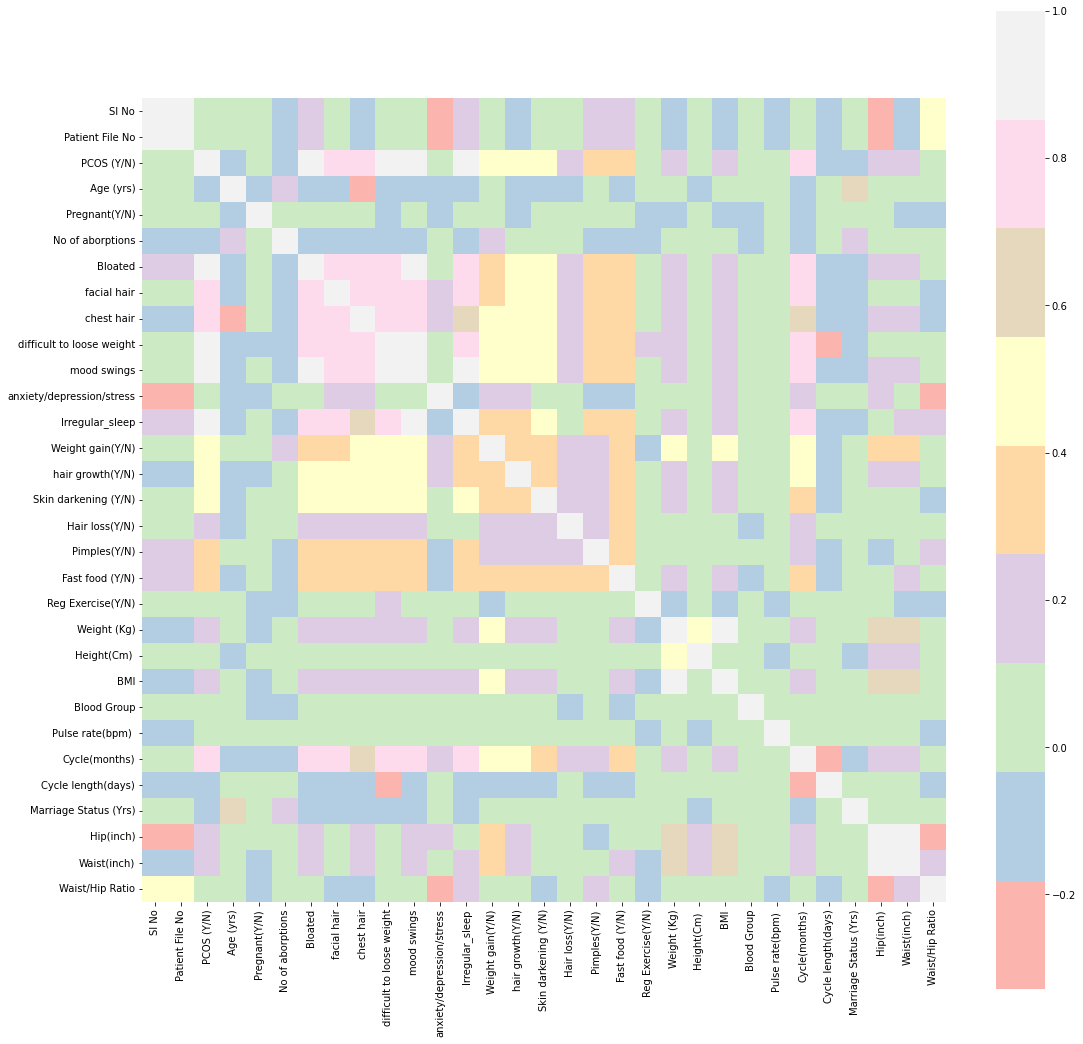

In [ ]:
#Examaning a correlation matrix of all the features 

corrmat = df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);


In [ ]:
corrmat["PCOS (Y/N)"].sort_values(ascending=False)


PCOS (Y/N)                   1.000000
mood swings                  1.000000
Bloated                      0.910538
Irregular_sleep              0.900521
difficult to loose weight    0.889252
facial hair                  0.835610
Cycle(months)                0.834507
chest hair                   0.806519
Skin darkening (Y/N)         0.475733
hair growth(Y/N)             0.464667
Weight gain(Y/N)             0.441047
Fast food (Y/N)              0.378720
Pimples(Y/N)                 0.286077
Weight (Kg)                  0.211938
BMI                          0.199534
Hair loss(Y/N)               0.172879
Waist(inch)                  0.164598
Hip(inch)                    0.162297
Pulse rate(bpm)              0.091821
anxiety/depression/stress    0.075082
Height(Cm)                   0.068254
Reg Exercise(Y/N)            0.065337
Sl No                        0.060998
Patient File No              0.060998
Blood Group                  0.036433
Waist/Hip Ratio              0.012386
Pregnant(Y/N

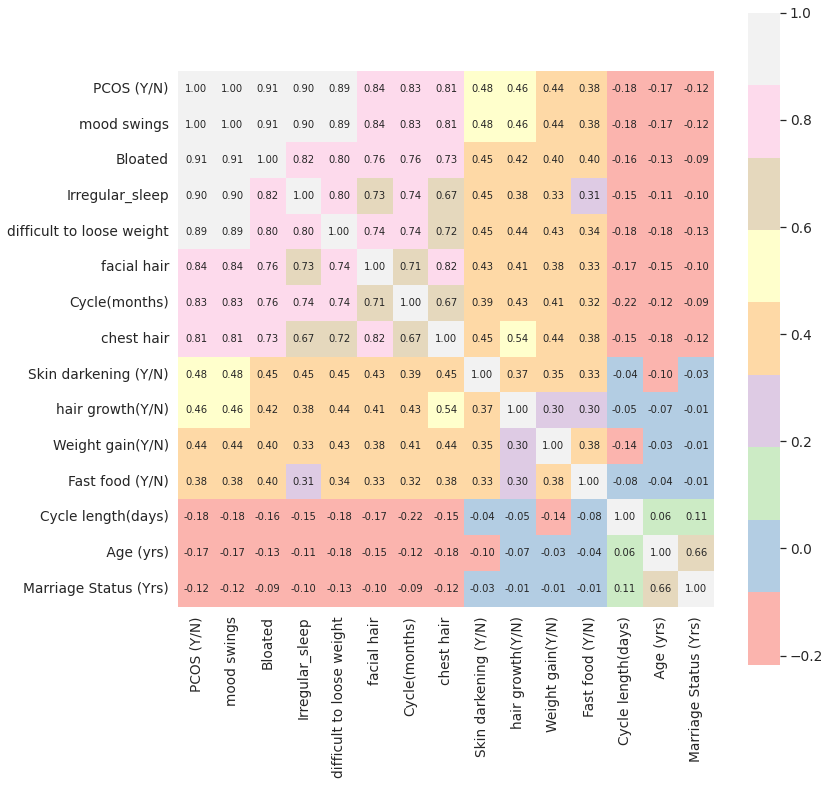

In [ ]:
#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


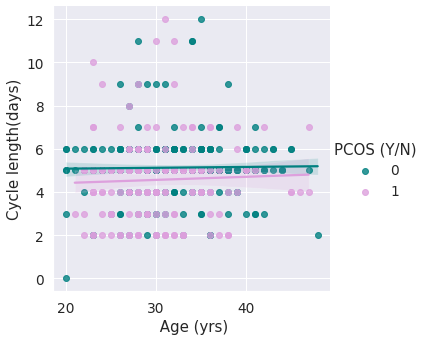

In [ ]:
# Length of menstrual phase in PCOS vs normal 
color = ["teal", "plum"]
fig=sns.lmplot(data=df,x=" Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

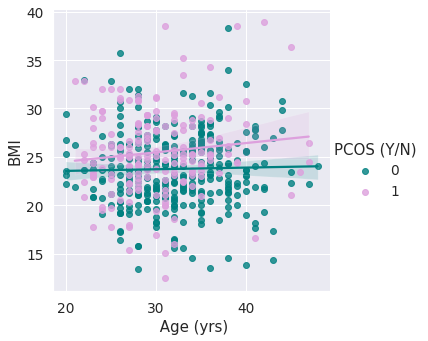

In [ ]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =df,x=" Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

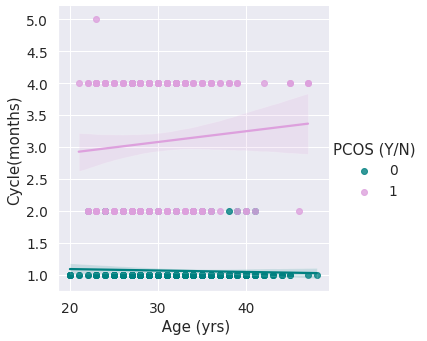

In [ ]:
# cycle IR wrt age 
sns.lmplot(data =df,x=" Age (yrs)",y="Cycle(months)", hue="PCOS (Y/N)",palette=color)
plt.show()

In [ ]:
# Distribution of follicles in both ovaries. 
# sns.lmplot(data =df,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
# plt.show()

### dropping the unecessary columns

In [ ]:
df.drop(columns = ["Sl No", "Patient File No"], axis = 1, inplace = True)
#  adding inplace = true drops the columns from original dataframe,and if not used, it creates a new dataframe


In [ ]:
df.columns


Index(['PCOS (Y/N)', ' Age (yrs)', 'Pregnant(Y/N)', 'No of aborptions',
       'Bloated', 'facial hair', 'chest hair', 'difficult to loose weight',
       'mood swings', 'anxiety/depression/stress', 'Irregular_sleep',
       'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'Reg Exercise(Y/N)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Blood Group',
       'Pulse rate(bpm) ', 'Cycle(months)', 'Cycle length(days)',
       'Marriage Status (Yrs)', 'Hip(inch)', 'Waist(inch)', 'Waist/Hip Ratio'],
      dtype='object')

In [ ]:
train.info()

NameError: ignored

In [ ]:
train.describe()

### splitting numerical and categorical columns


In [ ]:
numerical_cols = ["No of aborptions", "Weight (Kg)" ,"Height(Cm) " ,"BMI" ,"Blood Group" ,"Pulse rate(bpm) " ,"Cycle(months)" ,"Cycle length(days)" ,"Marriage Status (Yrs)" ,"Hip(inch)", "Waist(inch)", "Waist/Hip Ratio"]
categorical_cols = list(set(df.columns) - set(numerical_cols)- {"PCOS (Y/N)"})

In [ ]:
numerical_cols


['No of aborptions',
 'Weight (Kg)',
 'Height(Cm) ',
 'BMI',
 'Blood Group',
 'Pulse rate(bpm) ',
 'Cycle(months)',
 'Cycle length(days)',
 'Marriage Status (Yrs)',
 'Hip(inch)',
 'Waist(inch)',
 'Waist/Hip Ratio']

In [ ]:
categorical_cols

['Fast food (Y/N)',
 'Irregular_sleep',
 'Skin darkening (Y/N)',
 'Pimples(Y/N)',
 'Pregnant(Y/N)',
 'Reg Exercise(Y/N)',
 'anxiety/depression/stress',
 'difficult to loose weight',
 ' Age (yrs)',
 'facial hair',
 'Bloated',
 'mood swings',
 'Hair loss(Y/N)',
 'hair growth(Y/N)',
 'Weight gain(Y/N)',
 'chest hair']

### splitting data

In [ ]:
df_train, df_test = train_test_split(train, test_size = 0.2, random_state = 42)

NameError: ignored

In [ ]:
len(df_train), len(df_test)

NameError: ignored

### scaling numerical columns
this is required because the numerical columns might have data 1 as well as 800. in this case 800 may be considered as outlier. so we need to apply standard scaling to bring all the values in a particular range 

In [ ]:
scaler = StandardScaler()
def get_features_and_target_array(df, numerical_cols, categorical_cols, scaler):
  x_numeric_scaled = scaler.fit_transform(df[numerical_cols]) #it will take every data point of numerical column and it will transform it to -1 to 1 range
  x_categorical = df[categorical_cols].to_numpy() #categorical cols
  x = np.hstack((x_categorical, x_numeric_scaled)) #single array of the above two arrays so that it can directly be added to model
  y = df["PCOS (Y/N)"]
  return x, y

In [ ]:
x_train, y_train = get_features_and_target_array(df, numerical_cols, categorical_cols, scaler)

### train
# 1. Logistic Regression

In [ ]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
x_test, y_test = get_features_and_target_array(df, numerical_cols, categorical_cols, scaler)

In [ ]:
test_pred = clf.predict(x_test)

In [ ]:
mean_squared_error(y_test, test_pred)

0.0

In [ ]:
accuracy_score(y_test, test_pred)

1.0

In [ ]:
confusion_matrix(y_test, test_pred)

# 2. Decision Tree

In [ ]:
dc_clf = DecisionTreeClassifier()
dc_clf.fit(x_train, y_train)

dlf_pred = dc_clf.predict(x_test)
print(mean_squared_error(y_test, dlf_pred))
print(accuracy_score(y_test, dlf_pred))

0.0
1.0


# 3. SVM


In [ ]:
svm_clf = SVC()
svm_clf.fit(x_train, y_train)
x_test = [[1,28,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,44,152,19.3,15,78,1,5,7,36,30,0.83333]]

svm_pred = svm_clf.predict(x_test)
print(svm_pred)
# print(mean_squared_error(y_test, svm_pred))
# print(accuracy_score(y_test, svm_pred))

[0]


In [ ]:
from sklearn.metrics import f1_score


In [ ]:
f1_score(y_test, test_pred, average='macro')

1.0